# **Sales Advertising Analysis**

## 1️⃣ **Introduction**

This project focuses on analyzing the effectiveness of advertising strategies across various channels, including traditional media such as TV, radio, and newspapers, as well as digital marketing. Linear regression is employed to predict sales, aiming to inform strategic decision-making in marketing.

## 2️⃣ **Data Cleaning**

Import all the needed libraries such as: pandas, matplotlib.pyplot, seaborn, statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Load the data by the following link:\
https://raw.githubusercontent.com/letuanGithubVn1/Sales-advertising-analysis/refs/heads/master/sales_advertising.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/letuanGithubVn1/Sales-advertising-analysis/refs/heads/master/sales_advertising.csv')

Let's take a look at the loaded data.

Output 5 random rows:

In [ ]:
df.sample(5)

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
1779,856.784421,74.635242,206.804467,765.938047,6697.529819
4677,965.274958,80.937928,119.427730,1167.054090,8560.914944
941,598.760202,155.446280,51.554388,692.836385,5810.344138
3617,860.608766,93.968274,287.161841,1843.373732,12758.933461
2154,190.573731,171.656866,131.559774,1615.600682,8154.525381


Then it's reasonable to take a look at columns, dtypes and non-null values. Let's output this.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             4985 non-null   float64
 1   radio_ads          4982 non-null   float64
 2   newspaper_ads      4977 non-null   float64
 3   digital_marketing  4974 non-null   float64
 4   sales              4982 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


*Show* a descriptive statistics of all columns:

In [ ]:
df.describe()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
count,4985.000000,4982.000000,4977.000000,4974.000000,4982.000000
mean,553.657446,271.148836,165.331063,1114.553668,7758.601336
std,309.177632,128.558088,78.497351,518.141180,2788.705500
min,100.010471,50.023772,30.042591,200.454418,1043.825466
25%,321.262698,161.161510,96.729169,674.282712,5483.593562
50%,550.361031,268.687208,163.928071,1124.985865,7836.046852
75%,774.432493,380.026295,235.335541,1552.196991,9986.817587
max,6735.856228,499.777335,299.947389,1999.864688,14322.724102


**General Conclusions:**
The dataset contains a small number of missing values across all columns. Overall, the distributions of the columns appear to be relatively symmetric. **The sales** column shows a slight left skew, with a mean of **7758.6** and a median of **7836.0**. However, the maximum value of **14,322** suggests the potential presence of outliers in sales. **The digital_marketing** column exhibits a relatively wide range, which may also indicate the existence of outliers, although the median (1124.98) is close to the mean (1114.55)

### **📦 Handling Missing Values**

Choose any approach how to handle missing values and apply it.

In [ ]:
df.fillna({'tv_ads': df['tv_ads'].median()}, inplace=True)
df.fillna({'radio_ads': df['radio_ads'].mean()}, inplace=True)
df.fillna({'newspaper_ads': df['newspaper_ads'].mean()}, inplace=True)
df.fillna({'digital_marketing': df['digital_marketing'].median()}, inplace=True)
df.fillna({'sales': df['sales'].mean()}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             5000 non-null   float64
 1   radio_ads          5000 non-null   float64
 2   newspaper_ads      5000 non-null   float64
 3   digital_marketing  5000 non-null   float64
 4   sales              5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


### **📦 Handling Outliers**

Let's remove outliers for the sales

In [ ]:
Q1 = df['sales'].quantile(q=0.25)
Q3 = df['sales'].quantile(q=0.75)

print(Q1, Q3)

IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

df_clean = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

676.8649334742672 1551.4610606120063
874.5961271377391
-635.0292572323415 2863.355251318615


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             5000 non-null   float64
 1   radio_ads          5000 non-null   float64
 2   newspaper_ads      5000 non-null   float64
 3   digital_marketing  5000 non-null   float64
 4   sales              5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


Let's remove outliers for the digital_marketing

In [ ]:
Q1 = df['digital_marketing'].quantile(q=0.25)
Q3 = df['digital_marketing'].quantile(q=0.75)

print(Q1, Q3)

IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

df_clean = df[(df['digital_marketing'] >= lower_bound) & (df['digital_marketing'] <= upper_bound)]

676.8649334742672 1551.4610606120063
874.5961271377391
-635.0292572323415 2863.355251318615


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             5000 non-null   float64
 1   radio_ads          5000 non-null   float64
 2   newspaper_ads      5000 non-null   float64
 3   digital_marketing  5000 non-null   float64
 4   sales              5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


**General Conclusions:**
After trying to remove outliers in the sales and digital_marketing columns, we found that it wasn’t really necessary.

## **3️⃣  Calculating Correlations**

**Objective:** Calculate and interpret correlations between variables in the dataset.

### **🧮 Calculations**

Finally, let's calculate correlations in the dataset and write insights and conclusion.


In [ ]:
matrix_columns = df.corr()
matrix_columns

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
tv_ads,1.000000,0.000727,0.004914,0.023060,0.259630
radio_ads,0.000727,1.000000,-0.007872,-0.002213,0.090883
newspaper_ads,0.004914,-0.007872,1.000000,-0.001604,-0.002868
digital_marketing,0.023060,-0.002213,-0.001604,1.000000,0.934212
sales,0.259630,0.090883,-0.002868,0.934212,1.000000


Then plot it as a heatmap using Seaborn:

Text(0.5, 1.0, 'the relationship between advertising costs for each channel and sales')

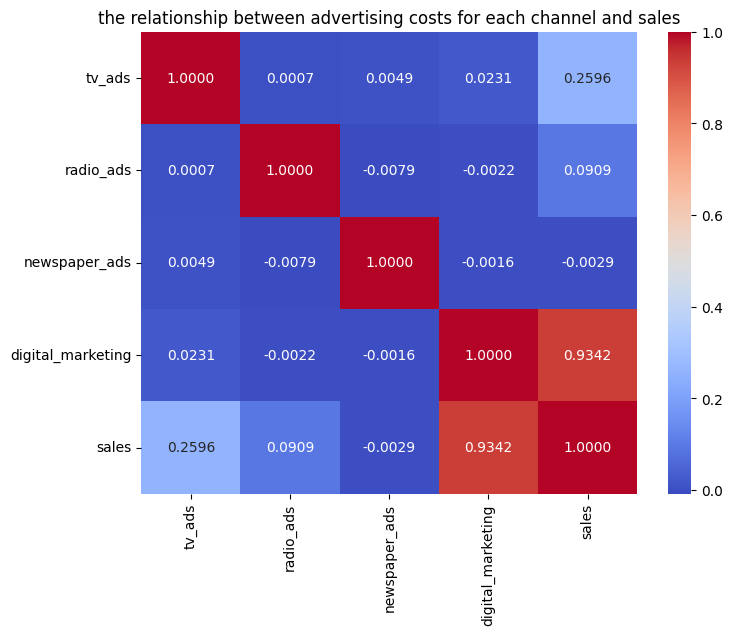

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(matrix_columns, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('the relationship between advertising costs for each channel and sales')

**Conclusions:**  
Most advertising channels exhibit weak correlations with sales, both positive and negative. In contrast, the digital marketing channel shows a very strong positive correlation with sales (r = 0.93), indicating it is the most significant driver of revenue.  
***Recommendation: It is advisable to allocate a larger portion of the budget to digital marketing, given its substantial impact on revenue.***

## **4️⃣ Regression**

**1. Create variables $x$ and $y$ containing 2 columns that you want to use for fitting multiple linear regression:**

In [ ]:
df.head()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
0,437.086107,227.135984,149.687216,1099.406439,7753.504975
1,955.642876,263.046047,145.524769,1544.144191,11683.762317
2,758.794548,434.546327,112.930487,1212.800205,8910.744929
3,638.792636,203.001974,250.521225,349.944650,3339.284889
4,240.416776,441.342358,157.564771,534.044426,4361.964031


In [ ]:
y = df['sales']
x = df[['tv_ads', 'radio_ads', 'newspaper_ads', 'digital_marketing']]

**2. Add a contant to $x$**

In [ ]:
x = sm.add_constant(x)

**3. Fit simple linear regression model**

In [ ]:
model = sm.OLS(y, x).fit()

**4. Print the summary**

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.892e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        07:32:12   Log-Likelihood:                -39797.
No. Observations:                5000   AIC:                         7.960e+04
Df Residuals:                    4995   BIC:                         7.964e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               457.7749     41.21

#### **Overall model fit**


- **R-squared: $0.938$**: This means that $93.8\%$ of the variance in the dependent variable (`sales`) is explained by the independent variables (`tv_ads`, `radio_ads`, `newspaper` and `digital_marketing`). This indicates a very good fit of the model to the data.
- **Adj. R-squared: $0.938$**: This adjusts for the number of predictors in the model and still indicates a very good fit.

#### **Individual coefficients**


Let's look at each coefficient and its significance:


1. **Intercept (const):**
   - coef: $457.7749$: This is the value of sale when all independent variables are zero.
2. **Slopes:**
    - $Newspaper$:
        - coef: $-0.0646$: For every unit increase in cost of Newspaper, Sale decrease by $-0.0646$ units, holding all other variables constant.
        - p-value: $0.606$: This is higher than  0.05 , indicating that the slope is not statistically significant. It means that we can exclude it from the model

### **Scenario-Based Analysis**




- If Newspaper Ads are stopped
The coefficient for newspaper_ads is -0.0646 (not statistically significant) → Predicted sales remain nearly unchanged.

- If focusing on a single advertising channel
    - TV Ads only:
Coefficient = 2.1474 → Every unit spent on TV Ads increases sales by an average of 2.15 units.

    - Radio Ads only:
Coefficient = 2.012 → Every unit spent on Radio Ads increases sales by an average of 2.01 units. **Effective, almost as strong as TV Ads.**

    - Digital Marketing focus:
Coefficient = 5.0036 → Every unit spent on Digital Marketing increases sales by an average of 5.00 units. **Quick comparison: the most effective among all channels**

### **Summary**


- The model explains $93.8\%$ of the variance in sales, indicating a very good fit.
- tv_ads, radio_ads ,digital_marketing width are all statistically significant predictors of sales.
- The newspaper is not statistically significant, which is not uncommon in multiple regression models.  

**Conclusion:** The model is strong enough for prediction, but removing newspaper_ads could help improve its performance.